<a href="https://colab.research.google.com/github/sergey-jr/Interactive-Statistics-Notebooks/blob/master/Chi_square_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi-square test

### Table of contents
1.   Intro
2. Main formulas
3. Connection to other distribution
4. Examples

## Intro



The term "chi-squared test," also written as χ<sup>2</sup> test, refers to certain types of statistical hypothesis tests that are valid to perform when the test statistic is chi-squared distributed under the null hypothesis. Often, however, the term is used to refer to Pearson's chi-squared test and variants thereof. Pearson's chi-squared test is used to determine whether there is a statistically significant difference (i.e., a magnitude of difference that is unlikely to be due to chance alone) between the expected frequencies and the observed frequencies in one or more categories of a so-called contingency table.

There are two types of chi-square tests. Both use the chi-square statistic and distribution for different purposes:

- A chi-square goodness of fit test determines if a sample data matches a population (in terms of distribution). Another name for it - Pearson's chi-squared test.
- A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
 - A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.
 - A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.



## Main formulas

### Degree of Freedom

$DF = (rows - 1)*(columns - 1)$

### chi-squred calculation

$\chi^{2}_{cal} = \sum_{i=1}^{n} \frac{(O_i-E_i)^2}{E_i}$

- O = each Observed (actual) value
- E = each Expected value

## Connection with other tests:

For an exact test used in place of the 2 x 2 chi-squared test for independence, see [Fisher's exact test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

For an exact test used in place of the 2 x 1 chi-squared test for goodness of fit, see [Binomial test](https://en.wikipedia.org/wiki/Binomial_test).

## Setup


In [0]:
! pip install ipywidgets
! jupyter nbextension enable --py widgetsnbextension

In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import numpy as np
import scipy.stats as stats
import pandas as pd
import json
import matplotlib.pyplot as plt


## Examples

### Example 1.

256 visual artists were surveyed to find out their zodiac sign. The results were: Aries (29), Taurus (24), Gemini (22), Cancer (19), Leo (21), Virgo (18), Libra (19), Scorpio (20), Sagittarius (23), Capricorn (18), Aquarius (20), Pisces (23). 

Test the hypothesis that zodiac signs are evenly distributed across visual artists.

In [0]:
expect = 256/12
data = [["Aries", 29, expect], ["Taurus", 24, expect], ["Gemini", 22, expect], ["Cancer", 19, expect], ["Leo", 21, expect], 
        ["Virgo", 18, expect], ["Libra", 19, expect],["Scorpio", 20, expect], ["Sagittarius", 23, expect], ["Sagittarius", 23, expect], 
        ["Capricorn", 18, expect], ["Aquarius", 20, expect], ["Pisces", 23, expect]] 
data = np.array([np.array(item) for item in data])

In [0]:
df = pd.DataFrame(data, columns=["zodiac sign", "Observed", "Excpected"])
df.Observed = df.Observed.astype(np.float32)
df.Excpected = df.Excpected.astype(np.float32)

In [5]:
df

,zodiac sign,Observed,Excpected
0,Aries,29.0,21.333334
1,Taurus,24.0,21.333334
2,Gemini,22.0,21.333334
3,Cancer,19.0,21.333334
4,Leo,21.0,21.333334
5,Virgo,18.0,21.333334
6,Libra,19.0,21.333334
7,Scorpio,20.0,21.333334
8,Sagittarius,23.0,21.333334
9,Sagittarius,23.0,21.333334


In [6]:
@interact(alpha=(0, 0.25, 0.01))
def check_chisquare(alpha=0.1):
  degree_freedom = (df.shape[0]-1)*(df.shape[1]-2)
  chi_calc = (((df["Observed"].values - df["Excpected"].values)**2)/df["Excpected"].values).sum()
  krit = stats.chi2.ppf(1 - alpha, degree_freedom)

  if chi_calc < krit:
    print("Null hypothesis is true")
  if chi_calc > krit:
    print("Null hypothesis can be rejected")
  
  x = np.linspace(stats.chi2.ppf(0.01, degree_freedom), stats.chi2.ppf(0.99, degree_freedom), 100)

  plt.plot(x, stats.chi2.pdf(x, degree_freedom), alpha=0.6, label=f' X ~ χ^2({degree_freedom})')

  plt.vlines(krit, 0.0, 1.0, colors='r', linestyles="dashdot", label=f"Crit. Value: {krit:.2f}")
  plt.vlines(chi_calc, 0.0, 1.0, linestyles="dashdot", label=f"Calc. Value: {chi_calc:.2f}")
  plt.legend()

interactive(children=(FloatSlider(value=0.1, description='alpha', max=0.25, step=0.01), Output()), _dom_classe…

### Example 2. 

We have some sets of data, each of them consisits from ~250 elements. We want to check their dictribution. The distributions we will chick on them: normal, uniform and longnorm.

In [0]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1DDUaP-_eHH5a1P2AcCpjqO61oFT_kHzn' -O datasets.zip
!unzip datasets.zip -d ./datasets

In [0]:
def set_narrow(arr, arr1):
    arr = list(arr)
    arr1 = list(arr1)
    arr2 = list(arr)
    i = 0
    while any([item < 5 for item in arr2]):
        if i < len(arr2):
            if arr2[i] < 5:
                if i == 0:
                    arr[i + 1] += arr[i]
                    arr2[i + 1] += arr[i]
                elif i == len(arr2) - 2:
                    arr[i] += arr[i + 1]
                    arr2[i] += arr[i + 1]
                    arr2.pop()
                    arr1.pop()
                    i -= 1
                else:
                    arr[i - 1] += arr[i]
                    arr2[i - 1] += arr[i]
                if i not in [len(arr2) - 2, len(arr2) - 1]:
                    arr2.pop(i)
                    arr1.pop(i)
                    i -= 1
            i += 1
        else:
            break
    return np.array(arr2), np.array(arr1)

In [9]:
@interact(alpha=(0, 0.25, 0.01))
def check_distribution(variant=range(1, 16), low=["lognorm", "uniform", "exp"], alpha=0.1):
  data = json.load(open(f'./datasets/var{variant}.json'))
  x = np.array(data['x'], dtype=float)
  n = len(x)  # count of points
  m = int(round(3.32 * np.log10(n) + 1)) # parts to divide 
  p, intervals = np.histogram(x, m)  # p - array of count of points that fall into the intervals
  a, b = x.min(), x.max()
  print("The original set:")
  print("p=", p)
  print("delta=", intervals)
  print("m=", m)
  p, delta = set_narrow(p, intervals)  # narrowing of the set
  m1 = len(p)
  print("Narrowed set:")
  print("p=", p)
  print("delta=", delta)
  print("m1=", m1)

  # plotting bar chart
  X = np.array([(delta[j] + delta[j + 1]) / 2 for j in range(m1)])
  Y = np.array([p[j] / (delta[j + 1] - delta[j]) for j in range(m1)])
  fig = plt.figure(dpi=100)
  plt.bar(X, Y, 1)

  # set interval min=-inf; max=inf
  delta[0] = -np.inf
  delta[-1] = np.inf
  # setting distribution type
  if low == 'lognorm':
      mu, sigma = np.log(x).mean(), np.sqrt(np.log(x).var())
      dist = stats.lognorm(sigma, scale=np.exp(mu))
      print(mu, sigma)
  elif low == 'exp':
      la = 1 / x.mean()
      dist = stats.expon(scale=1 / la)
      print(la)
  else:
      dist = stats.uniform(a, b)
      print(a, b)
  # setting real percentage of fall into intervals multiply by N
  nt = np.array([dist.cdf(delta[j + 1]) - dist.cdf(delta[j]) for j in range(m1 - 1)]) * n

  # calculating chi
  chi = np.array([(p[j] - nt[j]) ** 2 / nt[j] for j in range(m1 - 1)]).sum()
  # finding table value
  krit = stats.chi2.ppf(1 - alpha, m - 3)
  # plotting
  h = 10 ** -3
  r = np.arange(a - h * 2, b + h * 2, h)
  y1 = dist.pdf(r) * n
  plt.plot(r, y1, linewidth=2, color='y')
  plt.show()
  
  if chi < krit:
    print("Data is goes from {} distribution".format(low))
  if chi > krit:
    print("Data is not goes from {} distribution".format(low))

interactive(children=(Dropdown(description='variant', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …

### Example 3.

An engineer is investing the amount of standard deviation in the time it takes a 3D printer to make a particular part. The engineer believes that the standard deviation in the time it takes to make the part is more than 4. Test this at  level of significance, using 11 sample times taken while the printer was making these parts. The sample standard deviation is 4.3.

$n=11$ $s=4.3$

The hypothesis testing problem is $H_0: \sigma=4$ against  $H_A: \sigma>4$(right-tailed)

The test statistic for testing above hypothesis testing problem is
$\chi^2=\frac{(n-1)s^2}{\sigma^2}$

The test statistic follows chi-square distribution with $n-1$ degrees of freedom

The significance level is $\alpha=0.01$.

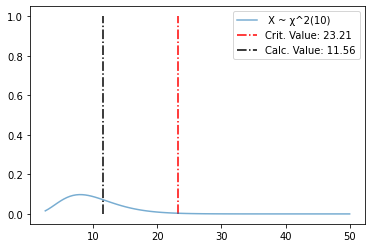

In [10]:
n = 11
s = 4.3
sigma = 4
alpha = 0.01
chi_calc = ((n-1)*(s**2))/(sigma**2)
chi_krit = stats.chi2.ppf(1-alpha, n-1)
x = np.linspace(stats.chi2.ppf(0.01, n-1), 50, 100)

plt.plot(x, stats.chi2.pdf(x, n-1), alpha=0.6, label=f' X ~ χ^2({n-1})')

plt.vlines(chi_krit, 0.0, 1.0, colors='r', linestyles="dashdot", label=f"Crit. Value: {chi_krit:.2f}")
plt.vlines(chi_calc, 0.0, 1.0, linestyles="dashdot", label=f"Calc. Value: {chi_calc:.2f}")
plt.legend()

## Applications

In cryptanalysis, the chi-squared test is used to compare the distribution of plaintext and (possibly) decrypted ciphertext. The lowest value of the test means that the decryption was successful with high probability.This method can be generalized for solving modern cryptographic problems.

In bioinformatics, chi-squared test is used to compare the distribution of certain properties of genes (e.g, genomic content, mutation rate, interaction network clustering, etc.) belonging to different categories (e.g., disease genes, essential genes, genes on a certain chromosome etc.).

## Conclusion

Two potential disadvantages of chi square are:

- The chi square test can only be used for data put into classes (bins). If you have non-binned data you’ll need to make a frequency table or histogram before performing the test.
- Another disadvantage of the chi-square test is that it requires a sufficient sample size in order for the chi-square approximation to be valid.

## References / Acknowledgements

1. https://en.wikipedia.org/wiki/Chi-squared_test
2. https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/
3. https://www.statisticshowto.datasciencecentral.com/goodness-of-fit-test/